# Predicting Covid-19 cases in India


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import spearmanr

#### Importing Data

In [4]:
raw_data=pd.read_csv('Covid-19DatasheetFinal.csv')

In [5]:
raw_data.head()

,StateName,PopulationSizePercent,PopulationDensityKm2,UrbanPopulationPercent,HealthExpenditurePerCapita,NumberOfDoctorsPercentTotal,SeniorCitizenInCr,CovidRecoveredCount,CovidDeathCount,CovidCasesCount
0,Andhra Pradesh,4.08,303.0,70.53,7429.0,8.00,0.600,6,4,348
1,Andaman and Nicobar Islands,0.03,46.0,62.30,340.0,0.03,0.001,0,0,11
2,Arunachal Pradesh,0.11,17.0,77.06,1119.0,0.04,0.005,0,0,1
3,Assam,2.58,397.0,85.90,5377.0,1.31,0.200,0,0,28
4,Bihar,8.60,1102.0,88.71,6668.0,5.33,0.600,0,1,39


In [6]:
raw_data.columns

Index(['StateName', 'PopulationSizePercent', 'PopulationDensityKm2',
       'UrbanPopulationPercent', 'HealthExpenditurePerCapita',
       'NumberOfDoctorsPercentTotal', 'SeniorCitizenInCr',
       'CovidRecoveredCount', 'CovidDeathCount', 'CovidCasesCount'],
      dtype='object')

In [7]:
raw_data.describe()

,PopulationSizePercent,PopulationDensityKm2,UrbanPopulationPercent,HealthExpenditurePerCapita,NumberOfDoctorsPercentTotal,SeniorCitizenInCr,CovidRecoveredCount,CovidDeathCount,CovidCasesCount
count,29.000000,29.000000,29.000000,29.000000,28.000000,29.000000,30.000000,30.000000,30.000000
mean,3.182759,1132.751724,60.615517,5135.827586,3.306786,0.270448,15.866667,5.466667,189.466667
std,3.764170,2595.814799,23.209745,4303.114529,4.001865,0.298101,25.844006,13.333218,271.258209
min,0.020000,2.800000,2.500000,340.000000,0.030000,0.001000,0.000000,0.000000,1.000000
25%,0.210000,189.000000,52.300000,1119.000000,0.287500,0.020000,0.000000,0.000000,11.500000
50%,2.290000,350.000000,68.130000,4487.000000,1.820000,0.200000,5.500000,1.000000,40.500000
75%,4.990000,573.000000,75.130000,7429.000000,4.197500,0.400000,21.000000,4.750000,323.500000
max,16.510000,11297.000000,89.970000,18967.000000,15.550000,1.200000,117.000000,72.000000,1135.000000


## CHECKING THE MISSING VALUE AND FILLING IT.

In [8]:
# Missing Value check
raw_data.isnull().sum()

StateName                      0
PopulationSizePercent          1
PopulationDensityKm2           1
UrbanPopulationPercent         1
HealthExpenditurePerCapita     1
NumberOfDoctorsPercentTotal    2
SeniorCitizenInCr              1
CovidRecoveredCount            0
CovidDeathCount                0
CovidCasesCount                0
dtype: int64

In [9]:
data=raw_data.copy()

#### FILLING THE MISSING DATA WITH THE MEAN

In [10]:
data.PopulationSizePercent=data.PopulationSizePercent.fillna(value=data.PopulationSizePercent.mean())
data.PopulationDensityKm2=data.PopulationDensityKm2.fillna(value=data.PopulationDensityKm2.mean())
data.UrbanPopulationPercent=data.UrbanPopulationPercent.fillna(value=data.UrbanPopulationPercent.mean())
data.HealthExpenditurePerCapita=data.HealthExpenditurePerCapita.fillna(value=data.HealthExpenditurePerCapita.mean())
data.NumberOfDoctorsPercentTotal=data.NumberOfDoctorsPercentTotal.fillna(value=data.NumberOfDoctorsPercentTotal.mean())
data.SeniorCitizenInCr=data.SeniorCitizenInCr.fillna(value=data.SeniorCitizenInCr.mean())

In [11]:
data.isnull().sum()

StateName                      0
PopulationSizePercent          0
PopulationDensityKm2           0
UrbanPopulationPercent         0
HealthExpenditurePerCapita     0
NumberOfDoctorsPercentTotal    0
SeniorCitizenInCr              0
CovidRecoveredCount            0
CovidDeathCount                0
CovidCasesCount                0
dtype: int64

In [12]:
data.rename(columns = {0: 'PopSizePercent',1: 'PopDensityKm2',
       2:'UrbanPopPercent', 3:'HealthExpenPerCapita',
       4:'NoOfDocPercentTotal', 5:'SeniorCitizenInCr',
       6:'CovidRecoveredCount', 7:'CovidDeathCount', 8:'CovidCasesCount'}, inplace = True)

###### DROPING THE 'STATENAME' COULMN

In [13]:
del data['StateName']

In [14]:
data.head()

,PopulationSizePercent,PopulationDensityKm2,UrbanPopulationPercent,HealthExpenditurePerCapita,NumberOfDoctorsPercentTotal,SeniorCitizenInCr,CovidRecoveredCount,CovidDeathCount,CovidCasesCount
0,4.08,303.0,70.53,7429.0,8.00,0.600,6,4,348
1,0.03,46.0,62.30,340.0,0.03,0.001,0,0,11
2,0.11,17.0,77.06,1119.0,0.04,0.005,0,0,1
3,2.58,397.0,85.90,5377.0,1.31,0.200,0,0,28
4,8.60,1102.0,88.71,6668.0,5.33,0.600,0,1,39


# Now Analysing the Linear Relationship between independent variable and dependent variables

### For that we will scatter plot 

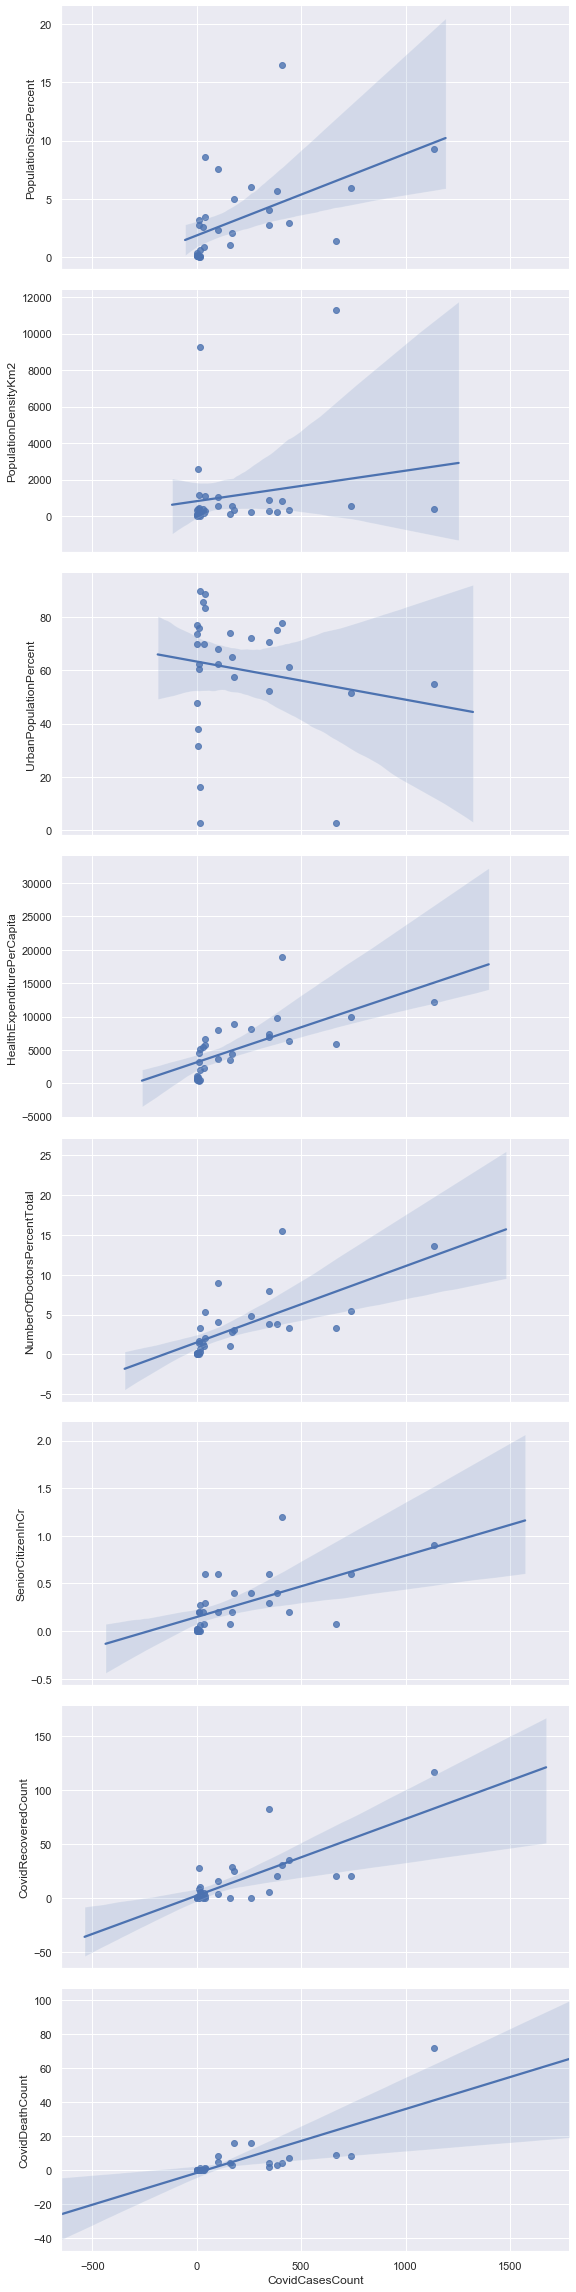

In [16]:
sns.pairplot(data=data,y_vars=['PopulationSizePercent', 'PopulationDensityKm2',
       'UrbanPopulationPercent', 'HealthExpenditurePerCapita',
       'NumberOfDoctorsPercentTotal', 'SeniorCitizenInCr',
       'CovidRecoveredCount', 'CovidDeathCount'],x_vars=['CovidCasesCount'],kind='reg',height=4,aspect=2,diag_kind="kde")

##### All variables seems to be linearly related to independent variable or nearly linearly realted except UrbanPopPercent. So we will apply log transformation and see the results again

Text(0, 0.5, 'UrbanPopulationPercent')

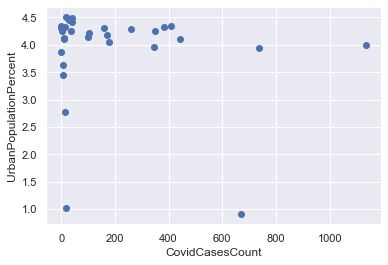

In [36]:
plt.scatter(data['CovidCasesCount'], np.log(data['UrbanPopulationPercent']))
plt.xlabel('CovidCasesCount'); plt.ylabel('UrbanPopulationPercent')

###### Now we will update the table of urban pupulation percent

In [38]:
data['UrbanPopulationPercent'] = np.log(data['UrbanPopulationPercent'])

In [39]:
data.head()

,PopulationSizePercent,PopulationDensityKm2,UrbanPopulationPercent,HealthExpenditurePerCapita,NumberOfDoctorsPercentTotal,SeniorCitizenInCr,CovidRecoveredCount,CovidDeathCount,CovidCasesCount
0,4.08,303.0,4.256038,7429.0,8.00,0.600,6,4,348
1,0.03,46.0,4.131961,340.0,0.03,0.001,0,0,11
2,0.11,17.0,4.344584,1119.0,0.04,0.005,0,0,1
3,2.58,397.0,4.453184,5377.0,1.31,0.200,0,0,28
4,8.60,1102.0,4.485373,6668.0,5.33,0.600,0,1,39


# Checking for Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

### Using Variance Inflation Factor(VIF)

In [136]:
variables=data.iloc[:,[0,1,2,3,4,5,6,7]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,23.584492,PopulationSizePercent
1,1.429741,PopulationDensityKm2
2,2.916630,UrbanPopulationPercent
3,24.628111,HealthExpenditurePerCapita
4,29.844065,NumberOfDoctorsPercentTotal
5,66.846920,SeniorCitizenInCr
6,3.727648,CovidRecoveredCount
7,3.010695,CovidDeathCount


## But instead of using VIF we will use sparse matrix correlation

In [126]:
data.corr()

,PopulationSizePercent,PopulationDensityKm2,UrbanPopulationPercent,HealthExpenditurePerCapita,NumberOfDoctorsPercentTotal,SeniorCitizenInCr,CovidRecoveredCount,CovidDeathCount,CovidCasesCount
PopulationSizePercent,1.000000,-0.129751,0.274479,0.922187,0.899761,0.955147,0.413137,0.409941,0.515164
PopulationDensityKm2,-0.129751,1.000000,-0.910748,-0.090220,-0.064396,-0.178712,0.000311,-0.022809,0.177610
UrbanPopulationPercent,0.274479,-0.910748,1.000000,0.164808,0.126378,0.248386,-0.019101,0.003999,-0.147188
HealthExpenditurePerCapita,0.922187,-0.090220,0.164808,1.000000,0.894254,0.936059,0.522522,0.455668,0.673880
NumberOfDoctorsPercentTotal,0.899761,-0.064396,0.126378,0.894254,1.000000,0.955183,0.575307,0.580742,0.673951
SeniorCitizenInCr,0.955147,-0.178712,0.248386,0.936059,0.955183,1.000000,0.497814,0.490168,0.597008
CovidRecoveredCount,0.413137,0.000311,-0.019101,0.522522,0.575307,0.497814,1.000000,0.741111,0.745631
CovidDeathCount,0.409941,-0.022809,0.003999,0.455668,0.580742,0.490168,0.741111,1.000000,0.763751
CovidCasesCount,0.515164,0.177610,-0.147188,0.673880,0.673951,0.597008,0.745631,0.763751,1.000000


### Results

**1. Attribute PopSizePercent is highly correlated with HealthExpenPerCapita, NoOfDocPercentTotal, SeniorCitizenInCr.** 
           **Action: Attribute PopSizePercent will be dropped.**

**2. PopDensityKm2 is negatively correlated with UrbanPopPercent and explained well by UrbanPopPercent.**
           **Action: PopDensityKm2 will be dropped.**

**3. NoOfDocPercentTotal is highly correlated with almost all the attributes.**
           **Action: Attribute NoOfDocPercentTotal will be dropped**
   
**Final Attributes Kept: UrbanPopPercent, HealthExpenPerCapita, SeniorCitizenInCr, CovidRecoveredCount, CovidDeathCount**



# Now we will fit the model on the original data

### Fitting linear Regression

In [73]:
# Slicing Independent and dependent attributes
X_attr = data.iloc[:,[0,1,2,3,4,5,6,7]]
Y_attr = data['CovidCasesCount']

# Dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_attr,Y_attr,test_size = 0.20, random_state = 1)

# Initiliazing Linear Regression Model
model_linear = LinearRegression()

# Fitting Linear Model
model_linear.fit(X_train, y_train)

# Predicting on test dataset
y_test_pred = model_linear.predict(X_test) 

### Getting the summary for the data

In [98]:
X_attr = data.iloc[:,[0,1,2,3,4,5,6,7]]
Y_attr = data['CovidCasesCount']
x_c=sm.add_constant(X_attr)
reg1=sm.OLS(Y_attr,x_c).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CovidCasesCount   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     14.91
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.56e-07
Time:                        17:13:02   Log-Likelihood:                -181.67
No. Observations:                  30   AIC:                             381.3
Df Residuals:                      21   BIC:                             393.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        -618.4773    365.157     -1.694      0.105   -1377.863     140.909
PopulationSizePercent         -70.0109     29.493     -2.374      0.027    -131.345      -8.677
PopulationDensityKm2            0.0598      0.029      2.097      0.048       0.000       0.119
UrbanPopulationPercent        126.2517     84.957      1.486      0.152     -50.427     302.930
HealthExpenditurePerCapita      0.0621      0.017      3.554      0.002       0.026       0.098
NumberOfDoctorsPercentTotal     9.4909     24.435      0.388      0.702     -41.324      60.306
SeniorCitizenInCr             168.1851    490.425      0.343      0.735    -851.709    1188.079
CovidRecoveredCount             1.4026      1.454      0.965      0.346      -1.620       4.426
CovidDeathCount                 9.3273      2.754      3.387      0.003       3.601      15.054
==============================================================================
Omnibus:                       15.028   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.634
Skew:                           1.150   Prob(JB):                     3.31e-05
Kurtosis:                       6.349   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
print("The model R Squared value is", r2_score(y_true=y_test, y_pred=y_test_pred))

The model R Squared value is 0.9131063101190204


In [138]:
print("The mean squared error is", mean_squared_error(y_test, y_test_pred))

The mean squared error is 114103.42181775777


### Comparing the actual and predicted values

In [77]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred.round(2)})

,Actual,Predicted
17,1135,1222.16
21,5,-2.40
10,169,244.19
19,1,-126.07
14,345,537.84
20,42,170.74


### Clearly our predicted and actual values varies a lot because of multicollinearity and some other factors also ,so in next model we will drop columns with multicollinearity and check again

# Model2(Without Multicollinearity)

In [140]:
# Sepcifying all features
features = ['UrbanPopulationPercent','HealthExpenditurePerCapita', 'SeniorCitizenInCr','CovidRecoveredCount', 'CovidDeathCount']

# Slicing Independent and dependent attributes
X_attr = data[features]
Y_attr = data['CovidCasesCount']

# Dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_attr,Y_attr,test_size = 0.20, random_state = 1)

# Initiliazing Linear Regression Model
model_linear_2 = LinearRegression()

# Fitting Linear Model
model_linear_2.fit(X_train, y_train)

# Predicting on test dataset
y_test_pred_2 = model_linear_2.predict(X_test) 

In [141]:
print("The model R Squared value is", r2_score(y_true=y_test, y_pred=y_test_pred_2).round(4))

The model R Squared value is 0.9683


In [142]:
print("The Mean Squared Error is ", mean_squared_error(y_test, y_test_pred_2).round(2))

The Mean Squared Error is  5055.89


## Again comparing Actual and Predicted values

In [143]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_2.round(0)})

,Actual,Predicted
17,1135,1265.0
21,5,2.0
10,169,192.0
19,1,-19.0
14,345,437.0
20,42,105.0


In [144]:
# Imputing negative value with 0
y_test_pred_2[y_test_pred_2 < 0 ] = 0

# Dataframe of Actual and Predicted
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_2.round(0)})

,Actual,Predicted
17,1135,1265.0
21,5,2.0
10,169,192.0
19,1,0.0
14,345,437.0
20,42,105.0


#### Now after removing Multicollinearity actual values and predicted values are more close

## Finding the summary

In [107]:
feat = ['UrbanPopulationPercent','HealthExpenditurePerCapita', 'SeniorCitizenInCr','CovidRecoveredCount', 'CovidDeathCount']
y=data['CovidCasesCount']
x2=data[feat]
x=sm.add_constant(x2)
reg=sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CovidCasesCount   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     19.57
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           9.14e-08
Time:                        17:25:18   Log-Likelihood:                -185.78
No. Observations:                  30   AIC:                             383.6
Df Residuals:                      24   BIC:                             392.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        163.0236    123.435      1.321      0.199     -91.734     417.781
UrbanPopulationPercent       -53.3330     30.028     -1.776      0.088    -115.307       8.641
HealthExpenditurePerCapita     0.0486      0.017      2.795      0.010       0.013       0.084
SeniorCitizenInCr           -367.1947    256.742     -1.430      0.166    -897.083     162.694
CovidRecoveredCount            2.0785      1.507      1.379      0.181      -1.032       5.189
CovidDeathCount                9.5029      2.859      3.323      0.003       3.601      15.404
==============================================================================
Omnibus:                       13.673   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.855
Skew:                           1.104   Prob(JB):                     0.000219
Kurtosis:                       5.934   Cond. No.                     7.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Backward elimination

### We can clearly notice that P value of CovidRecoveredCount >0.05 , so we can drop that column also.

### After dropping CovidRecoveredCount lets see the summary again

In [105]:
feats = ['UrbanPopulationPercent','HealthExpenditurePerCapita', 'SeniorCitizenInCr','CovidDeathCount']
y=data['CovidCasesCount']
x3=data[feats]
x12=sm.add_constant(x3)
reg12=sm.OLS(y,x12).fit()
reg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CovidCasesCount   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     23.15
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.25e-08
Time:                        17:22:43   Log-Likelihood:                -186.92
No. Observations:                  30   AIC:                             383.8
Df Residuals:                      25   BIC:                             390.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        172.9342    125.428      1.379      0.180     -85.389     431.258
UrbanPopulationPercent       -55.6646     30.516     -1.824      0.080    -118.513       7.184
HealthExpenditurePerCapita     0.0543      0.017      3.164      0.004       0.019       0.090
SeniorCitizenInCr           -410.3264    259.383     -1.582      0.126    -944.536     123.883
CovidDeathCount               12.1228      2.175      5.573      0.000       7.643      16.602
==============================================================================
Omnibus:                        8.349   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.885
Skew:                           0.746   Prob(JB):                       0.0194
Kurtosis:                       5.020   Cond. No.                     7.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Again P value of SeniorCitizenInCr >0.05 , so lets drop that column also

## Summary after dropping both SeniorCitizenInCr and CovidRecoveredCount.

In [106]:
feats1 = ['UrbanPopulationPercent','HealthExpenditurePerCapita','CovidDeathCount']
y=data['CovidCasesCount']
x4=data[feats1]
x123=sm.add_constant(x4)
reg123=sm.OLS(y,x123).fit()
reg123.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        CovidCasesCount   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     28.40
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.31e-08
Time:                        17:24:29   Log-Likelihood:                -188.35
No. Observations:                  30   AIC:                             384.7
Df Residuals:                      26   BIC:                             390.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        250.2380    118.808      2.106      0.045       6.025     494.451
UrbanPopulationPercent       -69.8935     29.991     -2.331      0.028    -131.540      -8.247
HealthExpenditurePerCapita     0.0293      0.007      4.222      0.000       0.015       0.044
CovidDeathCount               11.3153      2.175      5.203      0.000       6.845      15.785
==============================================================================
Omnibus:                        5.247   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.541
Skew:                           0.729   Prob(JB):                        0.170
Kurtosis:                       3.841   Cond. No.                     3.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now clearly P value of all the independent variable is less than 0.05.

# Model3

In [148]:
# Slicing Independent and dependent attributes
X_at = data[feats1]
Y_at = data['CovidCasesCount']

# Dividing data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_at,Y_at,test_size = 0.20, random_state = 1)

# Initiliazing Linear Regression Model
model_linear_3 = LinearRegression()

# Fitting Linear Model
model_linear_3.fit(X_train2, y_train2)

# Predicting on test dataset
y_test_pred_3 = model_linear_3.predict(X_test2) 

In [149]:
print("The model R Squared value is", r2_score(y_true=y_test2, y_pred=y_test_pred_3).round(4))

The model R Squared value is 0.9525


In [150]:
print("The Mean Squared Error is ", mean_squared_error(y_test2, y_test_pred_3).round(2))

The Mean Squared Error is  7574.28


### Actual vs Predicted

In [151]:
pd.DataFrame({'Actual': y_test2, 'Predicted': y_test_pred_3.round(0)})

,Actual,Predicted
17,1135,1250.0
21,5,20.0
10,169,118.0
19,1,-7.0
14,345,189.0
20,42,113.0


In [152]:
# Imputing negative value with 0
y_test_pred_3[y_test_pred_3 < 0 ] = 0

# Dataframe of Actual and Predicted
pd.DataFrame({'Actual': y_test2, 'Predicted': y_test_pred_3.round(0)})

,Actual,Predicted
17,1135,1250.0
21,5,20.0
10,169,118.0
19,1,0.0
14,345,189.0
20,42,113.0


## Summary

In [157]:
feats1 = ['UrbanPopulationPercent','HealthExpenditurePerCapita','CovidDeathCount']
X_at=data[feats1]
reg_summary=pd.DataFrame(X_at.columns.values,columns=['Features'])
reg_summary['Weights']=model_linear_3.coef_
reg_summary

,Features,Weights
0,UrbanPopulationPercent,-67.962502
1,HealthExpenditurePerCapita,0.027914
2,CovidDeathCount,13.067645


# Testing for Autocorrelation, Heteroscedasticity on Model 3 results


## Test for the presence of Autocorrelation

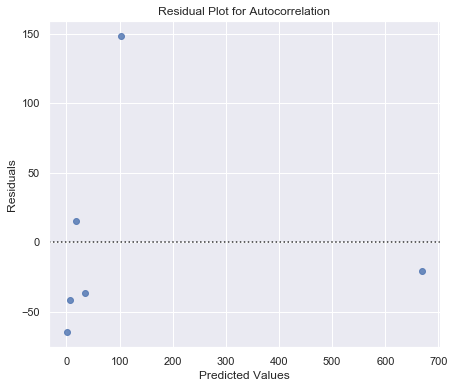

In [112]:
plt.figure(figsize= (7,6))
sns.residplot(y_test2, y_test_pred_3)
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.title("Residual Plot for Autocorrelation")
plt.show()

### Durbin Watson Test Outline:

Null Hypothesis of the test states that there is no correlation. 
The result of the test statistic is will always be between 0 and 4. 
The closer to 0 the statistic, the more evidence for positive serial correlation. 
The closer to 4, the more evidence for negative serial correlation.
The closer to 2, the more evidence for no serial correlation.


In [113]:
test_stats_value = durbin_watson(resids=y_test_pred_3 - y_test2)

In [114]:
print("The Durbin Watson Test statistic value is :", test_stats_value.round(2))

The Durbin Watson Test statistic value is : 1.78


**Test Conclusion: Since the test statistic value is closer to 2 hence it indicates no autocorrleation or fairly less autocorrelation**

# Test for the presence of Heteroscedasticity 

### Spearman Rank Correlation Test - Outline


H0: No Heteroscedasticity,
H1: Presence of Heteroscedasticity, 
if p value is lower than 0.05, we reject null hupothesis and conclude the presence of Heteroscedasticity

In [115]:
results_spearman_test = spearmanr(y_test2, y_test_pred_3)

In [116]:
print("The p value of spearman Rank Correlation test is ", results_spearman_test.pvalue.round(4)) 

The p value of spearman Rank Correlation test is  0.0048


**Test Conclusion: Since p value is lower than 0.05, we reject null hypothesis and conclude the presence of heterocedasticity** 

# Thank You